In [56]:
import numpy as np
from numpy.fft import fftn, fftshift, ifftn, ifftshift
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots

In [57]:
%matplotlib widget

In [140]:
def gaussian_kernel(size, sigma=1):
    """ 
    Returns a normalized 3D gauss kernel array for convolutions
    see https://math.stackexchange.com/questions/434629/3-d-generalization-of-the-gaussian-point-spread-function
    
    """
    size = int(size) // 2
    x, y, z = np.mgrid[-size:size+1, -size:size+1, -size:size+1]
    C = 1/(sigma**3 * (2*np.pi)**(3/2))
    g = C*np.exp(-(x**2 + y**2 + z**2) / (2 * sigma**2))
    
    return g, size

def fft_gaussian_kernel(ft_axis, sigma):
    sigma *= 1/(2*np.pi)
    qx, qy, qz = np.meshgrid(ft_axis, ft_axis, ft_axis)
    g_fft = np.exp(-2*np.pi**2*sigma**2 * (qx**2 + qy**2 + qz**2))
    
    return g_fft

In [163]:
sigma = 2
kernel, size = gaussian_kernel(200, sigma=sigma)
axis = np.arange(-size, size+1)
ft_kernel = fftn(kernel)
ft_kernel_shifted = fftshift(ft_kernel)
ft_axis = np.fft.fftfreq(len(axis), d=1) * 2 * np.pi
ft_axis = fftshift(ft_axis)
ik = np.abs(ft_kernel_shifted)**2

#method 2
ik2 = np.abs(fft_gaussian_kernel(ft_axis, sigma))**2

Text(0.5, 1.0, 'reciprocal space analytical')

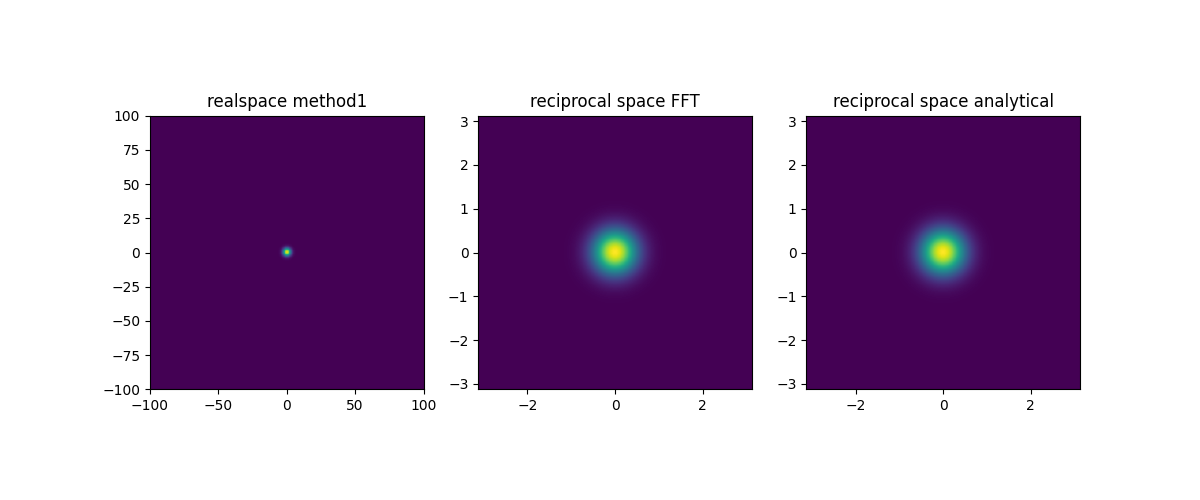

In [166]:
kernel_flat = np.sum(kernel, axis=0)
fig, (ax1, ax2, ax3) = subplots(1,3, figsize=(12,5))
ax1.imshow(kernel_flat, extent=[np.min(axis), np.max(axis), np.min(axis), np.max(axis)])
ax1.set_title('realspace method1')
ik_flat = np.sum(ik, axis=0)
ax2.imshow(ik_flat, extent=[np.min(ft_axis), np.max(ft_axis), np.min(ft_axis), np.max(ft_axis)])
ax2.set_title('reciprocal space FFT')
ik2_flat = np.sum(ik2, axis=0)
ax3.imshow(ik2_flat, extent=[np.min(ft_axis), np.max(ft_axis), np.min(ft_axis), np.max(ft_axis)])
ax3.set_title('reciprocal space analytical')

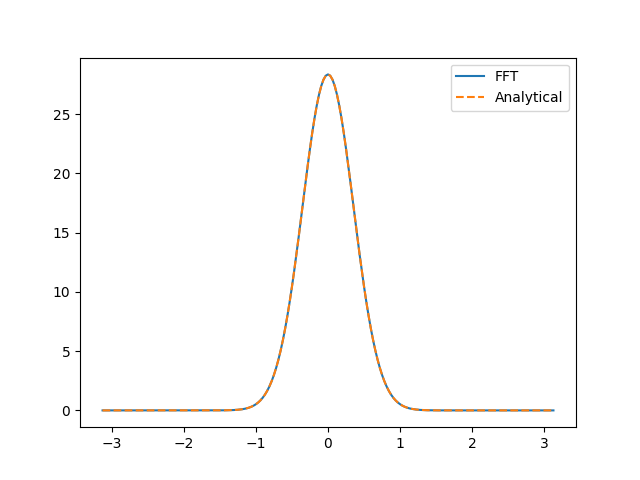

In [168]:
fig, ax1 = subplots(1,1)
ax1.plot(ft_axis, ik_flat[size,:], label='FFT')
ax1.plot(ft_axis, ik2_flat[size,:], label='Analytical', linestyle = '--')
ax1.legend()